In [1]:
import numpy as np
import numpy.random as rand
import math
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize

# Generate data

In [2]:
from random import random
from random import normalvariate

k = np.arange (1001)
x = 3*k/1000
y = np.array(k,dtype='float32')
f = 1/(x**2-3*x+2)

for k in range(1001): 
    delta = normalvariate(0, 1)
    if (f[k]<-100):
        y[k]=-100+delta
    else:
        if (f[k]>100):
            y[k]=100+delta
        else:
            y[k] = f[k]+delta


# LevenbergMarquardt algorithm

In [3]:
def func(x,a,b,c,d):
    return (a*x + b)/(x**2+c*x+d)

popt, _ = curve_fit(func, x, y, method = 'lm')
a_lm, b_lm, c_lm, d_lm = popt
print(a_lm, b_lm, c_lm, d_lm)

-0.9926730440144681 0.9931316273807674 -2.0008120124371076 1.0008278077823414


In [4]:
f0 = lambda a: (a[0]*x + a[1])/(x**2+a[2]*x+a[3])
from scipy.optimize import least_squares
x0 = np.array([1, 1, 1, 1])
res0 = least_squares(f0, x0, method ='lm')
a_lm = res0.x[0]
b_lm = res0.x[1]
c_lm = res0.x[2]
d_lm = res0.x[3]
nit_lm = res0.nfev
nfev_lm = res0.nfev

# Nelder-Mead algorithm

In [6]:
from scipy.optimize import minimize
f = lambda a: sum(((a[0]*x + a[1])/(x**2+a[2]*x+a[3])-y)**2)
x0 = np.array([1, 1, 1, 1])
res = minimize(f,x0,method='Nelder-Mead')
a_nm = res.x[0]
b_nm = res.x[1]
c_nm = res.x[2]
d_nm = res.x[3]
nit_nm = res.nit
nfev_nm = res.nfev

# Simulated Annealing

In [7]:
from scipy.optimize import basinhopping
minimizer_kwargs = {"method": "BFGS"}
res1 = basinhopping(f, x0, minimizer_kwargs=minimizer_kwargs, niter=200)
a_sa = res1.x[0]
b_sa = res1.x[1]
c_sa = res1.x[2]
d_sa = res1.x[3]
nit_sa = res1.nit
nfev_sa = res1.nfev

In [8]:
from scipy.optimize import dual_annealing
lw = [-5.12] * 10
up = [5.12] * 10
res1 = dual_annealing(f, bounds=list(zip(lw, up)))
a_sa = res1.x[0]
b_sa = res1.x[1]
c_sa = res1.x[2]
d_sa = res1.x[3]
nit_sa = res1.nit
nfev_sa = res1.nfev

# Differential Evolution

In [9]:
from scipy.optimize import differential_evolution
bounds = [(0,2), (0, 2), (0, 2), (0, 2)]
res2 = differential_evolution(f, bounds)
a_de = res2.x[0]
b_de = res2.x[1]
c_de = res2.x[2]
d_de = res2.x[3]
nit_de = res2.nit
nfev_de = res2.nfev
print(nit_de, nfev_de)

1 130


<ipython-input-6-1c1d6651aded>:2: RuntimeWarning: invalid value encountered in true_divide
  f = lambda a: sum(((a[0]*x + a[1])/(x**2+a[2]*x+a[3])-y)**2)
<ipython-input-6-1c1d6651aded>:2: RuntimeWarning: divide by zero encountered in true_divide
  f = lambda a: sum(((a[0]*x + a[1])/(x**2+a[2]*x+a[3])-y)**2)


In [10]:
pip install --upgrade pyswarms

Note: you may need to restart the kernel to use updated packages.


# Particle Swarm Optimization

In [11]:
from pyswarm import pso


lb = [0, 0, 0, 0]
ub = [2, 2, 2, 2]
maxiter = 100

xopt, _ = pso(f, lb, ub, maxiter=maxiter, minstep=1e-8)
print(xopt)
a_pso = xopt[0]
b_pso = xopt[1]
c_pso = xopt[2]
d_pso = xopt[3]
nit_pso = maxiter
nfev_pso = maxiter

<ipython-input-6-1c1d6651aded>:2: RuntimeWarning: divide by zero encountered in true_divide
  f = lambda a: sum(((a[0]*x + a[1])/(x**2+a[2]*x+a[3])-y)**2)
<ipython-input-6-1c1d6651aded>:2: RuntimeWarning: invalid value encountered in true_divide
  f = lambda a: sum(((a[0]*x + a[1])/(x**2+a[2]*x+a[3])-y)**2)


Stopping search: Swarm best objective change less than 1e-08
[0.         0.14630894 0.         0.13770646]


# Results graphs

<ipython-input-13-b1be19880d7c>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_4.1.png", dpi=300, facecolor='w', edgecolor='w',
<ipython-input-13-b1be19880d7c>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = "D:/Магистр/Algorithms/graph_4.1.png", dpi=300, facecolor='w', edgecolor='w',


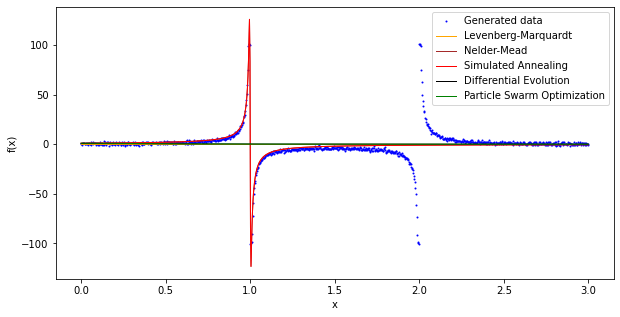

In [13]:
plt.figure(figsize=(10,5))
plt.plot(x, y, 'bo', label='Generated data', markersize=1)
plt.plot(x, func(x,a_lm,b_lm,c_lm,d_lm),'', color = 'orange', linewidth=1, label="Levenberg-Marquardt")
plt.plot(x, func(x,a_nm,b_nm,c_nm,d_nm),'', color = 'brown', linewidth=1, label="Nelder-Mead")
plt.plot(x, func(x,a_sa,b_sa,c_sa,d_sa),'', color = 'red', linewidth=1, label="Simulated Annealing")
plt.plot(x, func(x,a_de,b_de,c_de,d_de),'', color = 'black', linewidth=1, label="Differential Evolution")
plt.plot(x, func(x,a_pso,b_pso,c_pso,d_pso),'', color = 'green', linewidth=1, label="Particle Swarm Optimization")

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")

plt.savefig(fname = "D:/Магистр/Algorithms/graph_4.1.png", dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

In [ ]:
!pip install prettytable

In [14]:
from prettytable import PrettyTable
th = ['Method', 'a', 'b', 'c','d', 'minimum f', 'number of iterations', 'number of f-calculations' ]
td = ['Levenberg-Marquardt', '%.3f' % a_lm, '%.3f' % b_lm, '%.3f' % c_lm, '%.3f' % d_lm,  '%.3f' % f([a_lm,b_lm,c_lm,d_lm]), nit_lm, nfev_lm,
      'Nelder-Mead', '%.3f' % a_nm, '%.3f' % b_nm, '%.3f' % c_nm, '%.3f' % d_nm,  '%.3f' % f([a_nm,b_nm,c_nm,d_nm]), nit_nm, nfev_nm,
      'Simulated Annealing', '%.3f' % a_sa, '%.3f' % b_sa, '%.3f' % c_sa, '%.3f' % d_sa,  '%.3f' % f([a_sa,b_sa,c_sa,d_sa]), nit_sa, nfev_sa,
      'Differential Evolution', '%.3f' % a_de, '%.3f' % b_de, '%.3f' % c_de, '%.3f' % d_de,  '%.3f' % f([a_de,b_de,c_de,d_de]), nit_de, nfev_de,
      'Particle Swarm Optimization', '%.3f' % a_pso, '%.3f' % b_pso, '%.3f' % c_pso, '%.3f' % d_pso,  '%.3f' % f([a_pso,b_pso,c_pso,d_pso]), nit_pso, nfev_pso]

columns = len(th)
table = PrettyTable(th)
td_data = td[:]

while td_data:
    table.add_row(td_data[:columns])
    td_data = td_data[columns:]

print(table) 

+-----------------------------+--------+--------+--------+-------+------------+----------------------+--------------------------+
|            Method           |   a    |   b    |   c    |   d   | minimum f  | number of iterations | number of f-calculations |
+-----------------------------+--------+--------+--------+-------+------------+----------------------+--------------------------+
|     Levenberg-Marquardt     | 0.000  | -0.000 | 1.000  | 1.000 | 266482.442 |          21          |            21            |
|         Nelder-Mead         | -0.992 | 0.993  | -2.001 | 1.001 | 136018.803 |         296          |           507            |
|     Simulated Annealing     | -0.992 | 0.993  | -2.001 | 1.001 | 136018.806 |         1000         |          22443           |
|    Differential Evolution   | 0.026  | 0.448  | 0.549  | 0.663 | 266484.619 |          1           |           130            |
| Particle Swarm Optimization | 0.000  | 0.146  | 0.000  | 0.138 | 266372.295 |         10

# Implemented algorithm for сalculate the distance matrix for them and then apply the Simulated Annealing
# method to solve the corresponding Travelling Salesman Problem
# https://pythonmana.com/2021/05/20210504100711662r.html

In [ ]:
#  Simulated annealing algorithm for traveling salesman problem

import math                         
import random                       
import pandas as pd                 
import numpy as np                  
import matplotlib.pyplot as plt     

np.set_printoptions(precision=4)
pd.set_option('display.max_rows', 20)
pd.set_option('expand_frame_repr', False)
pd.options.display.float_format = '{:,.2f}'.format

def initParameter():
    # custom function initParameter():
    # Initial parameter for simulated annealing algorithm
    tInitial = 100.0                # (initial temperature)
    tFinal  = 1                     # (stop temperature)
    nMarkov = 1000                # Markov
    alfa    = 0.98                 # T(k)=alfa*T(k-1)

    return tInitial,tFinal,alfa,nMarkov

# TSPLib
def read_TSPLib(fileName):
    # custom function read_TSPLib(fileName)
    # Read datafile *.dat from TSPlib
    # return coordinates of each city by YouCans, XUPT
    res = []
    with open(fileName, 'r') as fid:
        for item in fid:
            if len(item.strip())!=0:
                res.append(item.split())

    loadData = np.array(res).astype('int')      # i Xi Yi
    coordinates = loadData[:,1::]
    return coordinates

# 
def getDistMat(nCities, coordinates):
    # custom function getDistMat(nCities, coordinates):
    # computer distance between each 2 Cities
    distMat = np.zeros((nCities,nCities))       # 
    for i in range(nCities):
        for j in range(i,nCities):
            # np.linalg.norm   ij 
            distMat[i][j] = distMat[j][i] = round(np.linalg.norm(coordinates[i]-coordinates[j]))
    return distMat                              # 

#  TSP 
def calTourMileage(tourGiven, nCities, distMat):
    # custom function caltourMileage(nCities, tour, distMat):
    # to compute mileage of the given tour
    mileageTour = distMat[tourGiven[nCities-1], tourGiven[0]]   # dist((n-1),0)
    for i in range(nCities-1):                                  # dist(0,1),...dist((n-2)(n-1))
        mileageTour += distMat[tourGiven[i], tourGiven[i+1]]
    return round(mileageTour)                     # 

#  TSP 
def plot_tour(tour, value, coordinates,fname):
    # custom function plot_tour(tour, nCities, coordinates)
    plt.figure(figsize=(10,5))
    num = len(tour)
    x0, y0 = coordinates[tour[num - 1]]
    x1, y1 = coordinates[tour[0]]
    plt.scatter(int(x0), int(y0), s=15, c='r')      #  C(n-1)
    plt.plot([x1, x0], [y1, y0], c='b')             #  C(n-1)~C(0)
    for i in range(num - 1):
        x0, y0 = coordinates[tour[i]]
        x1, y1 = coordinates[tour[i + 1]]
        plt.scatter(int(x0), int(y0), s=15, c='r')  #  C(i)
        plt.plot([x1, x0], [y1, y0], c='b')         #  C(i)~C(i+1)

    plt.xlabel("Total mileage of the tour:{:.1f}".format(value))
    plt.title("Optimization tour of TSP {:d}".format(num))  # 
    plt.savefig(fname = fname, dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None, 
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None, metadata=None)

# 
def mutateSwap(tourGiven, nCities):
    # custom function mutateSwap(nCities, tourNow)
    # produce a mutation tour with 2-Swap operator
    # swap the position of two Cities in the given tour

    #  [0,n)  2 i,j
    i = np.random.randint(nCities)          #  [0,n) 
    while True:
        j = np.random.randint(nCities)      #  [0,n) 
        if i!=j: break                      #  i, j 

    tourSwap = tourGiven.copy()             #  tourSwap
    tourSwap[i],tourSwap[j] = tourGiven[j],tourGiven[i] #   i  j 

    return tourSwap


<ipython-input-13-4c04bc8c2f61>:85: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = fname, dpi=300, facecolor='w', edgecolor='w',
<ipython-input-13-4c04bc8c2f61>:85: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = fname, dpi=300, facecolor='w', edgecolor='w',


i:0, t(i):100.00, valueNow:620.0, valueBest:620.0
i:1, t(i):98.00, valueNow:520.0, valueBest:509.0
i:2, t(i):96.04, valueNow:651.0, valueBest:509.0
i:3, t(i):94.12, valueNow:622.0, valueBest:509.0
i:4, t(i):92.24, valueNow:601.0, valueBest:509.0
i:5, t(i):90.39, valueNow:575.0, valueBest:509.0
i:6, t(i):88.58, valueNow:527.0, valueBest:501.0
i:7, t(i):86.81, valueNow:646.0, valueBest:501.0
i:8, t(i):85.08, valueNow:624.0, valueBest:501.0
i:9, t(i):83.37, valueNow:660.0, valueBest:501.0
i:10, t(i):81.71, valueNow:578.0, valueBest:501.0
i:11, t(i):80.07, valueNow:515.0, valueBest:501.0
i:12, t(i):78.47, valueNow:730.0, valueBest:494.0
i:13, t(i):76.90, valueNow:605.0, valueBest:494.0
i:14, t(i):75.36, valueNow:609.0, valueBest:494.0
i:15, t(i):73.86, valueNow:589.0, valueBest:494.0
i:16, t(i):72.38, valueNow:731.0, valueBest:494.0
i:17, t(i):70.93, valueNow:677.0, valueBest:494.0
i:18, t(i):69.51, valueNow:546.0, valueBest:494.0
i:19, t(i):68.12, valueNow:678.0, valueBest:494.0
i:20, t(i

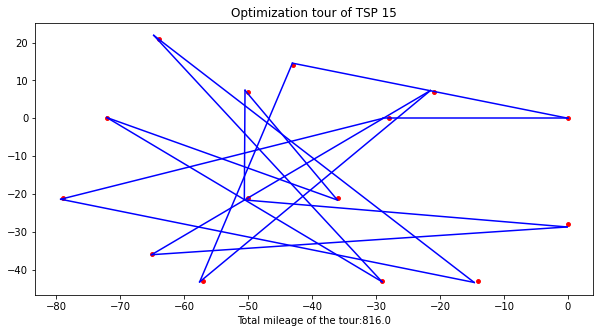

<Figure size 432x288 with 0 Axes>

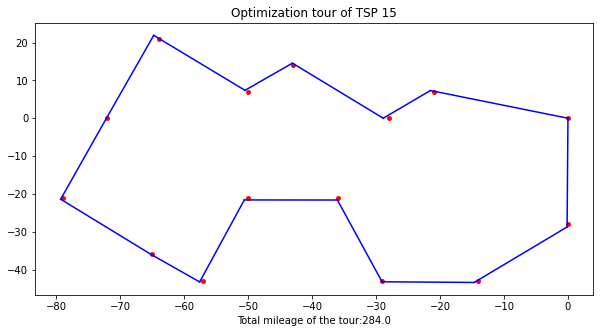

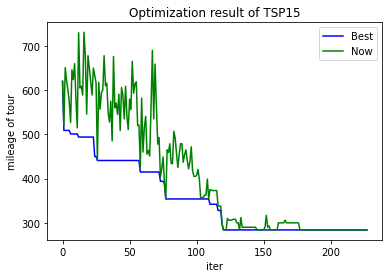

Tour verification successful!
Best tour: 
 [ 8  4  6  2 11 13  9  7  5  3 10  0 12  1 14]
Best value: 284.0


In [ ]:
coordinates = np.array([[0.549963E-07, 0.985808E-08], [-28.8733, -0.797739E-07], [-79.2916, -21.4033], [-14.6577, -43.3896], [-64.7473, 21.8982],
                        [-29.0585, -43.2167], [-72.0785, 0.181581], [-36.0366, -21.6135], [-50.4808, 7.37447], [-50.5859, -21.5882],
                        [-0.135819, -28.7293], [-65.0866, -36.0625], [-21.4983, 7.31942], [-57.5687, -43.2506], [-43.0700, 14.5548]])
# fileName = "../data/eil76.dat"                      # 
# coordinates = read_TSPLib(fileName)                 # 

# 
tInitial,tFinal,alfa,nMarkov = initParameter()      # 

nCities = coordinates.shape[0]              #   nCities
distMat = getDistMat(nCities, coordinates)  # 
nMarkov = nCities                           # Markov 
tNow    = tInitial                          #  (current temperature)

# 
tourNow   = np.arange(nCities)   # 01n 
valueNow  = calTourMileage(tourNow,nCities,distMat) #  valueNow
tourBest  = tourNow.copy()                          #  tourNow
valueBest = valueNow                                #  valueNow
recordBest = []                                     #  
recordNow  = []                                     #  


plot_tour(tourBest, valueBest, coordinates, "D:/Магистр/Algorithms/graph_4.2.png")


# 
iter = 0                        # 
while tNow >= tFinal:           # 
    # (nMarkov)

    for k in range(nMarkov):    # Markov
        # 
        tourNew = mutateSwap(tourNow, nCities)      #   
        # tourNew,deltaE = mutateSwapE(tourNow,nCities,distMat)   #    deltaE
        valueNew = calTourMileage(tourNew,nCities,distMat) # 
        deltaE = valueNew - valueNow

        #  Metropolis 
        if deltaE < 0:                          # 
            accept = True
            if valueNew < valueBest:            # 
                tourBest[:] = tourNew[:]
                valueBest = valueNew
        else:                                   # 
            pAccept = math.exp(-deltaE/tNow)    # 
            if pAccept > random.random():
                accept = True
            else:
                accept = False

        # 
        if accept == True:                      # 
            tourNow[:] = tourNew[:]
            valueNow = valueNew

    #  0,n-1
    tourNow = np.roll(tourNow,2)                # 

    # 
    recordBest.append(valueBest)                #  
    recordNow.append(valueNow)                  #  
    print('i:{}, t(i):{:.2f}, valueNow:{:.1f}, valueBest:{:.1f}'.format(iter,tNow,valueNow,valueBest))

    # 
    iter = iter + 1
    tNow = tNow * alfa                              # T(k)=alfa*T(k-1)

# 

# 
figure1 = plt.figure()     #  1
plot_tour(tourBest, valueBest, coordinates, "D:/Магистр/Algorithms/graph_4.3.png")
figure2 = plt.figure()     #  2
plt.title("Optimization result of TSP{:d}".format(nCities)) # 
plt.plot(np.array(recordBest),'b-', label='Best')           #  recordBest
plt.plot(np.array(recordNow),'g-', label='Now')             #  recordNow
plt.xlabel("iter")                                          #  x
plt.ylabel("mileage of tour")                               #  y
plt.legend()                                                # 
plt.show()

print("Tour verification successful!")
print("Best tour: \n", tourBest)
print("Best value: {:.1f}".format(valueBest))